In [1]:
# Code to plot Figure 1 (Briel paper)

In [2]:
from hoki import load
import matplotlib.pyplot as plt

In [3]:
bin_rates = load.model_output('./BPASS data/supernova-bin-imf135_300.z001.dat.gz')[:-1]
age = bin_rates.log_age.values
bin_size = bin_rates.age_yrs.values

In [4]:
# normalising transient rates
ccsne = (bin_rates[['IIP', 'II', 'Ib', 'Ic']].sum(axis=1))
ccsne_norm = ccsne/bin_size/(10**6)
typeIa_norm = bin_rates.Ia.values/bin_size/(10**6)
lgrbs_norm = bin_rates.LGRB.values/bin_size/(10**6)
pisne_norm = bin_rates.PISNe.values/bin_size/(10**6)

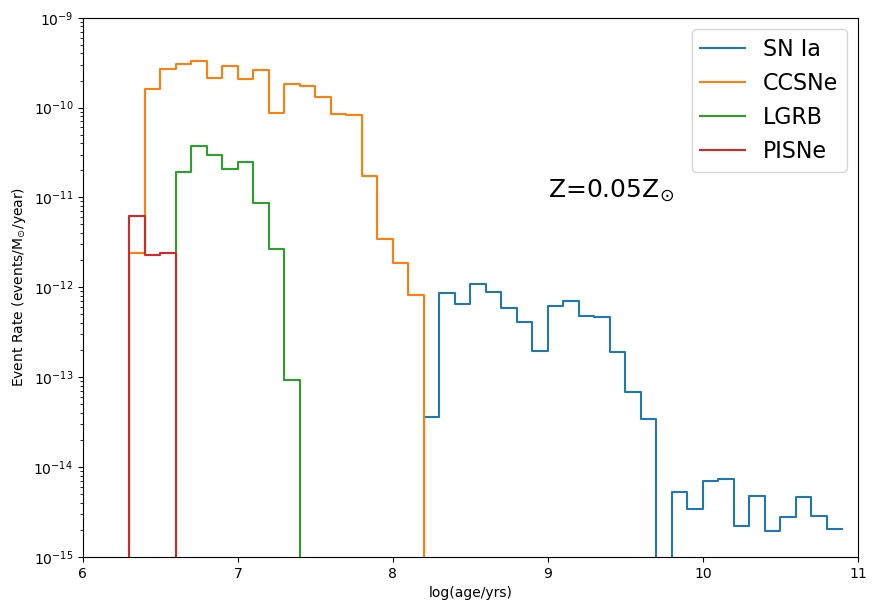

In [5]:
plt.figure(figsize = (10,7))
plt.step(age, typeIa_norm, label='SN Ia')
plt.step(age, ccsne_norm, label='CCSNe')
plt.step(age, lgrbs_norm, label='LGRB')
plt.step(age, pisne_norm, label='PISNe')
plt.yscale("log")
plt.text(9, 10**(-11), r"Z=0.05Z$_{\odot}$", fontsize=18)
plt.xlim(6, 11)
plt.ylim(10**(-15), 10**(-9))
plt.ylabel(r"Event Rate (events/M$_{\odot}$/year)")
plt.xlabel("log(age/yrs)")
plt.legend(fontsize=16)
plt.show()

In [6]:
# Code to plot Figure 2a (Briel paper)

In [7]:
import numpy as np
import scipy.integrate
import illustris_python as il

In [8]:
basePath = './sims.TNG/TNG100-1/output/'
fields = ['SubhaloSFRinMaxRad', 'SubhaloStarMetallicityMaxRad']

In [9]:
snapshots = [2, 3, 4, 6, 8, 11, 13, 17, 21, 25, 33, 40, 50, 59, 67, 72, 78, 84, 91, 99]  # list of 'full' snapshots
redshifts = [12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1.5, 1, 0.7, 0.5, 0.4, 0.3, 0.2, 0.1, 0]

In [10]:
sfr = []
for snapshot in snapshots:
    subhalo = il.groupcat.loadSubhalos(basePath, snapshot, fields=fields)
    sfr.append(sum(subhalo['SubhaloSFRinMaxRad']) / 100**3)  # unit conversion

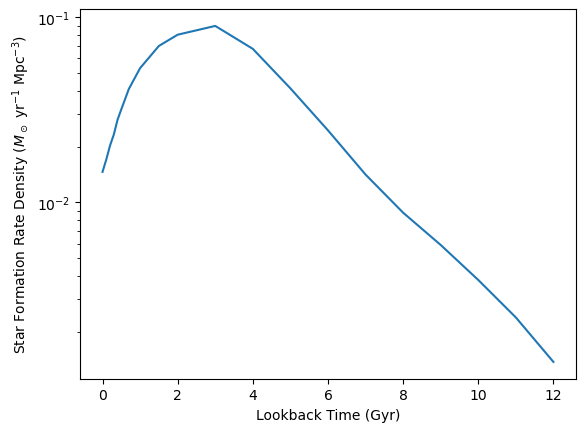

In [11]:
plt.plot(redshifts, sfr)
plt.yscale('log')
plt.ylabel('Star Formation Rate Density ($M_\odot$ yr$^{-1}$ Mpc$^{-3}$)')
plt.xlabel('Lookback Time (Gyr)')
plt.show()

In [12]:
# Code to plot Figure 2b (Briel paper)

In [13]:
def lookback(z, omega_M, omega_L, h):
    '''
    Calculates the lookback time according to a specific cosmology.

    Parameters:
    z : float
        The redshift at which the lookback time is to be calculated
    omega_M : float
        The matter density parameter (0.30897)
    omega_L : float
        The dark energy density parameter (0.6911)
    h : float
        The hubble parameter (0.6774)
    '''
    def f(x):
        a = np.sqrt(omega_M*(1+x)**3 + omega_L)
        return 1/((1+x)*a)
    t_hubble = (1/(100*h))*3.0856776*10**19
    return t_hubble*scipy.integrate.quad(f, 0, z)[0]/(60*60*24*365.2388526*1e9)

In [14]:
LB_time = []
for redshift in redshifts: 
    LB_time.append(lookback(redshift, 0.30897, 0.6911, 0.6774))

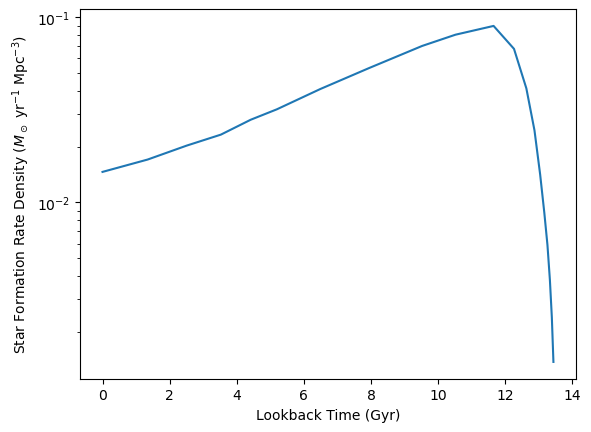

In [15]:
plt.plot(LB_time, sfr)
plt.yscale('log')
plt.ylabel('Star Formation Rate Density ($M_\odot$ yr$^{-1}$ Mpc$^{-3}$)')
plt.xlabel('Lookback Time (Gyr)')
plt.show()

In [16]:
# Finding Subhalo metallicities

In [17]:
Z_lower = [0.0000075, 0.000075, 0.00075, 0.00175, 0.00275, 0.00375, 0.00575, 0.00775, 0.0075, 0.0175, 0.0275, 0.0375]
Z_upper = [0.0000125, 0.000125, 0.00125, 0.00225, 0.00325, 0.00425, 0.00625, 0.00825, 0.0125, 0.0225, 0.0325, 0.0425]

In [78]:
#snapshots = np.linspace(1, 100, 99, endpoint=False).tolist()
snapshots = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0]
redshifts = []
for snap in snapshots:
    redshifts.append(il.groupcat.loadHeader(basePath, snap)['Redshift'])
redshifts = redshifts[:-1]
redshifts.append(int(0))

In [99]:
SFR_Z040 = []
SFR_Z030 = []
SFR_Z020 = []
SFR_Z010 = []
SFR_Z008 = []
SFR_Z006 = []
SFR_Z004 = []
SFR_Z003 = []
SFR_Z002 = []
SFR_Z001 = []
SFR_Zem4 = []
SFR_Zem5 = []
for snapshot in snapshots:
    Z040_ID = []
    Z030_ID = []
    Z020_ID = []
    Z010_ID = []
    Z008_ID = []
    Z006_ID = []
    Z004_ID = []
    Z003_ID = []
    Z002_ID = []
    Z001_ID = []
    Zem4_ID = []
    Zem5_ID = []
    subhalo = il.groupcat.loadSubhalos(basePath, snapshot, fields=['SubhaloStarMetallicityMaxRad', 'SubhaloFlag', 'SubhaloSFRinMaxRad'])
    for subhaloID, Z in enumerate(subhalo['SubhaloStarMetallicityMaxRad']):
        if subhalo['SubhaloFlag'][subhaloID]:
            if Z_lower[11] <= Z <= Z_upper[11]:
                Z040_ID.append(subhaloID)
            if Z_lower[10] <= Z <= Z_upper[10]:
                Z030_ID.append(subhaloID)
            if Z_lower[9] <= Z <= Z_upper[9]:
                Z020_ID.append(subhaloID)
            if Z_lower[8] <= Z <= Z_upper[8]:
                Z010_ID.append(subhaloID)
            if Z_lower[7] <= Z <= Z_upper[7]:
                Z008_ID.append(subhaloID)
            if Z_lower[6] <= Z <= Z_upper[6]:
                Z006_ID.append(subhaloID)
            if Z_lower[5] <= Z <= Z_upper[5]:
                Z004_ID.append(subhaloID)
            if Z_lower[4] <= Z <= Z_upper[4]:
                Z003_ID.append(subhaloID)
            if Z_lower[3] <= Z <= Z_upper[3]:
                Z002_ID.append(subhaloID)
            if Z_lower[2] <= Z <= Z_upper[2]:
                Z001_ID.append(subhaloID)
            if Z_lower[1] <= Z <= Z_upper[1]:
                Zem4_ID.append(subhaloID)
            if Z_lower[0] <= Z <= Z_upper[0]:
                Zem5_ID.append(subhaloID)
    Z040_sfr_list = []
    Z030_sfr_list = []
    Z020_sfr_list = []
    Z010_sfr_list = []
    Z008_sfr_list = []
    Z006_sfr_list = []
    Z004_sfr_list = []
    Z003_sfr_list = []
    Z002_sfr_list = []
    Z001_sfr_list = []
    Zem4_sfr_list = []
    Zem5_sfr_list = []
    for ID in [Z040_ID]:
        if Z040_ID == []:
            continue
        single_sfr = il.groupcat.loadSingle(basePath, snapshot, haloID=-1, subhaloID=ID[0])['SubhaloSFRinMaxRad']
        Z040_sfr_list.append(single_sfr)
    for ID in [Z030_ID]:
        if Z030_ID == []:
            continue
        single_sfr = il.groupcat.loadSingle(basePath, snapshot, haloID=-1, subhaloID=ID[0])['SubhaloSFRinMaxRad']
        Z030_sfr_list.append(single_sfr)
    for ID in [Z020_ID]:
        if Z020_ID == []:
            continue
        single_sfr = il.groupcat.loadSingle(basePath, snapshot, haloID=-1, subhaloID=ID[0])['SubhaloSFRinMaxRad']
        Z020_sfr_list.append(single_sfr)
    for ID in [Z010_ID]:
        if Z010_ID == []:
            continue
        single_sfr = il.groupcat.loadSingle(basePath, snapshot, haloID=-1, subhaloID=ID[0])['SubhaloSFRinMaxRad']
        Z010_sfr_list.append(single_sfr)          
    for ID in [Z008_ID]:
        if Z008_ID == []:
            continue
        single_sfr = il.groupcat.loadSingle(basePath, snapshot, haloID=-1, subhaloID=ID[0])['SubhaloSFRinMaxRad']
        Z008_sfr_list.append(single_sfr)
    for ID in [Z006_ID]:
        if Z006_ID == []:
            continue
        single_sfr = il.groupcat.loadSingle(basePath, snapshot, haloID=-1, subhaloID=ID[0])['SubhaloSFRinMaxRad']
        Z006_sfr_list.append(single_sfr)        
    for ID in [Z004_ID]:
        if Z004_ID == []:
            continue
        single_sfr = il.groupcat.loadSingle(basePath, snapshot, haloID=-1, subhaloID=ID[0])['SubhaloSFRinMaxRad']
        Z004_sfr_list.append(single_sfr)
    for ID in [Z003_ID]:
        if Z003_ID == []:
            continue
        single_sfr = il.groupcat.loadSingle(basePath, snapshot, haloID=-1, subhaloID=ID[0])['SubhaloSFRinMaxRad']
        Z003_sfr_list.append(single_sfr)
    for ID in [Z002_ID]:
        if Z002_ID == []:
            continue
        single_sfr = il.groupcat.loadSingle(basePath, snapshot, haloID=-1, subhaloID=ID[0])['SubhaloSFRinMaxRad']
        Z002_sfr_list.append(single_sfr)
    for ID in [Z001_ID]:
        if Z001_ID == []:
            continue
        single_sfr = il.groupcat.loadSingle(basePath, snapshot, haloID=-1, subhaloID=ID[0])['SubhaloSFRinMaxRad']
        Z001_sfr_list.append(single_sfr)
    for ID in [Zem4_ID]:
        if Zem4_ID == []:
            continue
        single_sfr = il.groupcat.loadSingle(basePath, snapshot, haloID=-1, subhaloID=ID[0])['SubhaloSFRinMaxRad']
        Zem4_sfr_list.append(single_sfr)
    for ID in [Zem5_ID]:
        if Zem5_ID == []:
            continue
        single_sfr = il.groupcat.loadSingle(basePath, snapshot, haloID=-1, subhaloID=ID[0])['SubhaloSFRinMaxRad']
        Zem5_sfr_list.append(single_sfr)
    SFR_Z040.append(sum(Z040_sfr_list)/100**3)
    SFR_Z030.append(sum(Z030_sfr_list)/100**3)
    SFR_Z020.append(sum(Z020_sfr_list)/100**3)
    SFR_Z010.append(sum(Z010_sfr_list)/100**3)
    SFR_Z008.append(sum(Z008_sfr_list)/100**3)
    SFR_Z006.append(sum(Z006_sfr_list)/100**3)
    SFR_Z004.append(sum(Z004_sfr_list)/100**3)
    SFR_Z003.append(sum(Z003_sfr_list)/100**3)
    SFR_Z002.append(sum(Z002_sfr_list)/100**3)
    SFR_Z001.append(sum(Z001_sfr_list)/100**3)
    SFR_Zem4.append(sum(Zem4_sfr_list)/100**3)
    SFR_Zem5.append(sum(Zem5_sfr_list)/100**3)
    print(snapshot)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16.0
17.0
18.0
19.0
20.0
21.0
22.0
23.0
24.0
25.0
26.0
27.0
28.0
29.0
30.0
31.0
32.0
33.0
34.0
35.0
36.0
37.0
38.0
39.0
40.0
41.0
42.0
43.0
44.0
45.0
46.0
47.0
48.0
49.0
50.0
51.0
52.0
53.0
54.0
55.0
56.0
57.0
58.0
59.0
60.0
61.0
62.0
63.0
64.0
65.0
66.0
67.0
68.0
69.0
70.0
71.0
72.0
73.0
74.0
75.0
76.0
77.0
78.0
79.0
80.0
81.0
82.0
83.0
84.0
85.0
86.0
87.0
88.0
89.0
90.0
91.0
92.0
93.0
94.0
95.0
96.0
97.0
98.0
99.0


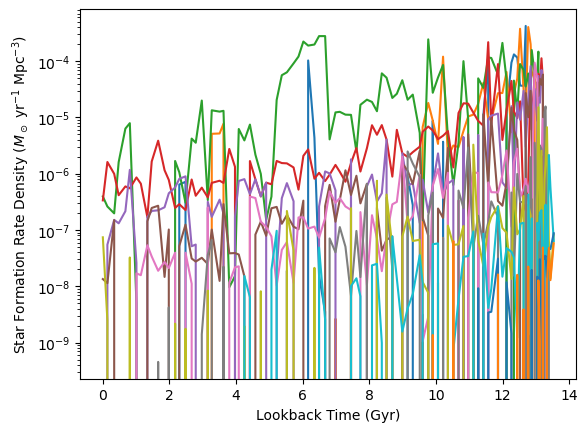

In [100]:
LB_time = []
for redshift in redshifts: 
    LB_time.append(lookback(redshift, 0.30897, 0.6911, 0.6774))

plt.plot(LB_time, SFR_Z040, label='Z=0.040')
plt.plot(LB_time, SFR_Z030, label='Z=0.030')
plt.plot(LB_time, SFR_Z020, label='Z=0.020')
plt.plot(LB_time, SFR_Z010, label='Z=0.010')
plt.plot(LB_time, SFR_Z008, label='Z=0.008')
plt.plot(LB_time, SFR_Z006, label='Z=0.006')
plt.plot(LB_time, SFR_Z004, label='Z=0.004')
plt.plot(LB_time, SFR_Z003, label='Z=0.003')
plt.plot(LB_time, SFR_Z002, label='Z=0.002')
plt.plot(LB_time, SFR_Z001, label='Z=0.001')
plt.plot(LB_time, SFR_Zem4, label='Z=0.0001')
plt.plot(LB_time, SFR_Zem5, label='Z=0.00001')
plt.yscale('log')
plt.ylabel('Star Formation Rate Density ($M_\odot$ yr$^{-1}$ Mpc$^{-3}$)')
plt.xlabel('Lookback Time (Gyr)')
#plt.legend()
plt.show()

In [112]:
import csv

file = open('./SFR_AllZ', 'w')
writer = csv.writer(file)
writer.writerow(SFR_Z040)
writer.writerow(SFR_Z030)
writer.writerow(SFR_Z020)
writer.writerow(SFR_Z010)
writer.writerow(SFR_Z008)
writer.writerow(SFR_Z006)
writer.writerow(SFR_Z004)
writer.writerow(SFR_Z003)
writer.writerow(SFR_Z002)
writer.writerow(SFR_Z001)
writer.writerow(SFR_Zem4)
writer.writerow(SFR_Zem5)
file.close()